# ROF Denoising Demo

In [ ]:
using Pkg, Random, Images, TestImages, LinearAlgebra
using AbstractOperators
using StructuredOptimization

In [10]:
Random.seed!(123); # For reproductibility

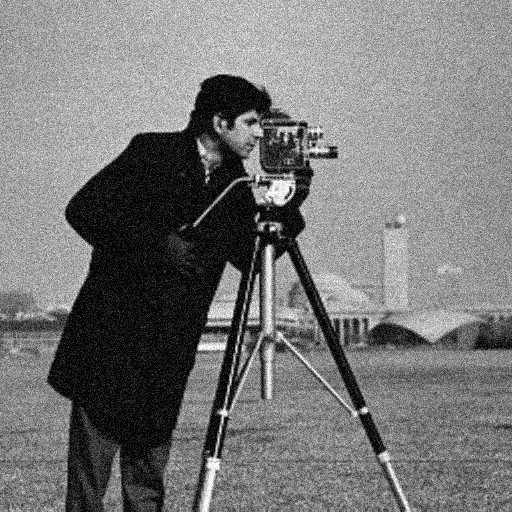

In [11]:
Xgt = testimage("cameraman")
Y = Xgt .+ sqrt(0.006*norm(Xgt,Inf))*randn(size(Xgt)) # Add noise
Y[Y .< 0] .= 0. # Make sure pixels are in range
Y[Y .> 1] .= 1.
Gray.(Y)

In [44]:
V = Variation(size(Y)) # Define the finite differences gradient operator
U = Variable(size(V,1)...)
lambda = 0.08
Y = float(Y);
size(V)

((262144, 2), (512, 512))

In [45]:
@time begin
@minimize ls(-V'*U+Y) + conj(lambda*norm(U,2,1,2)) with ForwardBackward(tol = 1e-3, gamma = 1/8, fast = true) # Minimizing the dual formulation
end

  4.250649 seconds (2.09 k allocations: 1.955 GiB, 7.30% gc time)


((Variable(Float64, (262144, 2)),), 325)

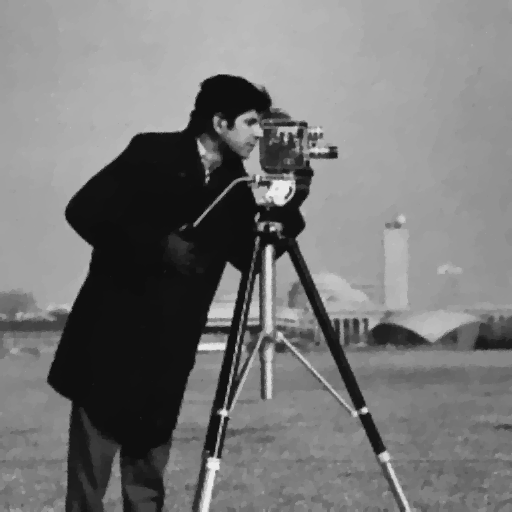

In [46]:
X = Gray.(-V'*(~U)+Y)